In [3]:
import numpy as np
import matplotlib.pyplot as plt

from pyDOE import lhs
from scipy.integrate import odeint

from pancreasModel import modelPID, simulation

from moonlight import *

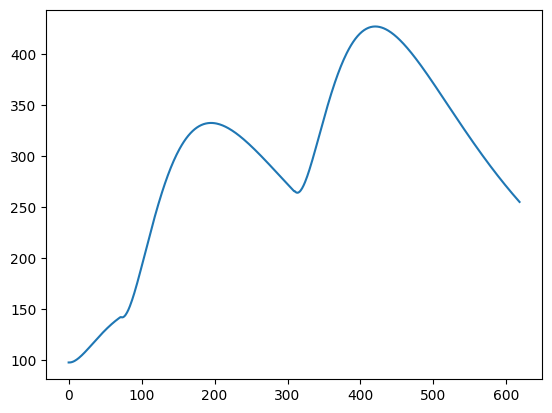

<function matplotlib.pyplot.show(close=None, block=None)>

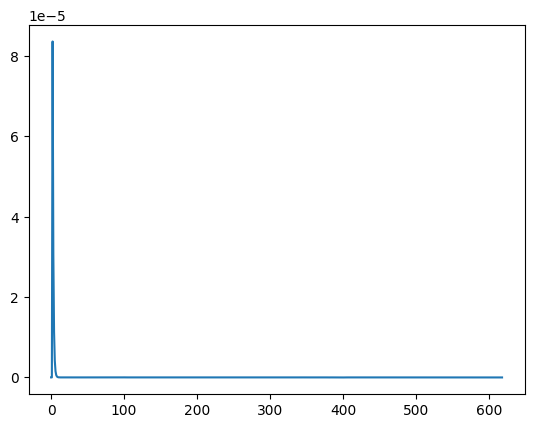

In [4]:
Kp = [1] # P factor
Ki = [2] # I factor
Kd = [3] # D factor

timeOfMeals = [
    np.random.normal(100, 20), 
    np.random.normal(200, 20), 
    np.random.normal(300, 20)
]
dGs = [
    np.random.normal(40, 20), 
    np.random.normal(90, 20), 
    np.random.normal(60, 20)
]

pancreas_model = lambda x, t: modelPID(x, t, Kp[0], Ki[0], Kd[0])

t, y = simulation(timeOfMeals, dGs, pancreas_model)


# print(timeOfMeals)
# print(dGs)
# plt.plot(t, y)
glucose = y[:,0]
insulin = y[:,-1]
plt.plot(t, y[:,0])
plt.show()
plt.plot(t, y[:,-1])
plt.show

In [ ]:
script = """
signal { real g; }
domain minmax; 
formula low_glucose = globally [0, 600] ( g < 250 );
"""
input = list(zip(glucose,insulin))

spec = ScriptLoader.loadFromText(script)
monitor = spec.getMonitor("low_glucose")
result = monitor.monitor(t.tolist(), glucose.reshape(-1,1).tolist()) # (t, v)
result

[[0.0, -177.29643591198612], [18.0, -177.29643591198612]]

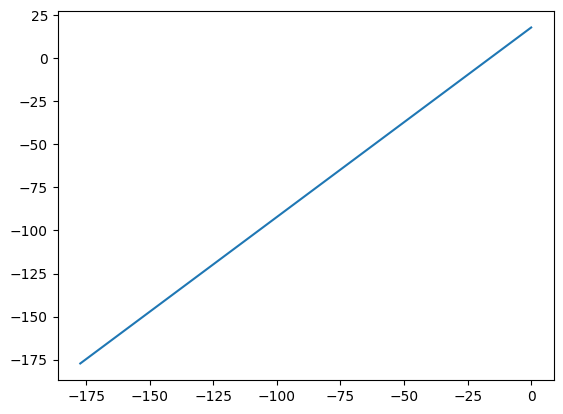

In [37]:
plt.plot(result[0], result[1])